import the libraries and load dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

import warnings

warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv('breast_cancer.csv')

In [3]:
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
print(dataset.shape)

(569, 33)


Mapping class string values to Numbers

In [5]:
dataset['diagnosis'] = dataset['diagnosis'].map({'B': 0, 'M': 1}).astype(int)

In [6]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


segregate dataset into x(input) and y(output)

In [7]:
x = dataset.iloc[:, 2:32].values
x

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [8]:
y = dataset.iloc[:, 1].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

Splitting dataset into train and test

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)

Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train)

[[-0.65079907 -0.43057322 -0.68024847 ... -0.36433881  0.32349851
  -0.7578486 ]
 [-0.82835341  0.15226547 -0.82773762 ... -1.45036679  0.62563098
  -1.03071387]
 [ 1.68277234  2.18977235  1.60009756 ...  0.72504581 -0.51329768
  -0.96601386]
 ...
 [-1.33114223 -0.22172269 -1.3242844  ... -0.98806491 -0.69995543
  -0.12266325]
 [-1.25110186 -0.24600763 -1.28700242 ... -1.75887319 -1.56206114
  -1.00989735]
 [-0.74662205  1.14066273 -0.72203706 ... -0.2860679  -1.24094654
   0.2126516 ]]


In [11]:
print(x_test)

[[-0.21395901  0.3125461  -0.14355187 ...  1.37043754  1.08911166
   1.53928319]
 [-0.26750714  1.461224   -0.32955207 ... -0.84266106 -0.71577388
  -0.88105993]
 [-0.03922298 -0.86770223 -0.10463112 ... -0.505318   -1.20298225
  -0.92494342]
 ...
 [-0.51270124 -1.69096186 -0.54095317 ... -0.12632201  0.33773512
  -0.42872244]
 [-0.17732081 -2.01395163 -0.17345939 ... -0.62875108 -0.29500302
  -0.65432858]
 [ 1.5305829  -0.26300709  1.57961296 ...  1.6694843   1.18085869
   0.48889253]]


Validating some Machine Learning algorithm by its accuracy - Model Score

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score, StratifiedKFold

In [13]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))

models.append(('LDA', LinearDiscriminantAnalysis()))

models.append(('KNN', KNeighborsClassifier()))

models.append(('CART', DecisionTreeClassifier()))

models.append(('NB', GaussianNB()))

models.append(('SVM', SVC(gamma = 'auto')))

In [14]:
print(models)

[('LR', LogisticRegression(multi_class='ovr', solver='liblinear')), ('LDA', LinearDiscriminantAnalysis()), ('KNN', KNeighborsClassifier()), ('CART', DecisionTreeClassifier()), ('NB', GaussianNB()), ('SVM', SVC(gamma='auto'))]


LR: 0.981285
LDA: 0.957863
KNN: 0.964839
CART: 0.931949
NB: 0.941417
SVM: 0.979014


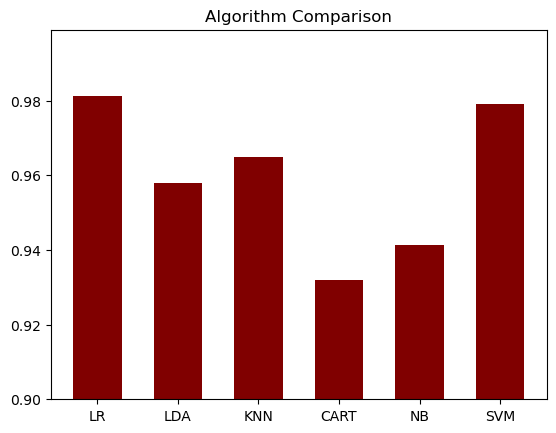

In [15]:
results = []
names= []
res = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    res.append(cv_results.mean())
    print('%s: %f' % (name, cv_results.mean()))
    
pyplot.ylim(.900, .999)
pyplot.bar(names, res, color='maroon', width = 0.6)

pyplot.title('Algorithm Comparison')
pyplot.show()

Training  and prediction using the algorithm with high accuracy

In [16]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(x_train, y_train)
value = [[17.99, 10.38, 122.8, 1001, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871, 1.095, 0.9053, 
          8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.6, 
          2019, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189]]
y_pred = model.predict(value)
print(y_pred)

[1]


In [17]:
y_pred

array([1])